# Financial Data
This section works with locally stored financial datasets in excel files (e.g., in the form of .xls or .xlsx). Before importing the data, some packages imports and customizations:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data Import
pandas provides a number of different functions and DataFrame methods to import data stored in different formats (CSV, SQL, Excel, etc.) and to export data to different formats. The following code uses the pd.read_excel() function to import the time series data set from the excel file:

In [12]:
UKHP=pd.read_excel('https://raw.githubusercontent.com/HeyyNing/labs/main/lab1/UKHP.xls',
                   index_col=0)

In [13]:
UKHP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 327 entries, 1991-01-01 to 2018-03-01
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average House Price  327 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


You can take a first look at the data, either by inspecting or visualizing it:

In [14]:
UKHP.head()

,Average House Price
Month,
1991-01-01,53051.721106
1991-02-01,53496.798746
1991-03-01,52892.861606
1991-04-01,53677.435270
1991-05-01,54385.726747


In [15]:
UKHP.tail(3)

,Average House Price
Month,
2018-01-01,211755.925562
2018-02-01,210402.402935
2018-03-01,211625.333253


<Axes: xlabel='Month'>

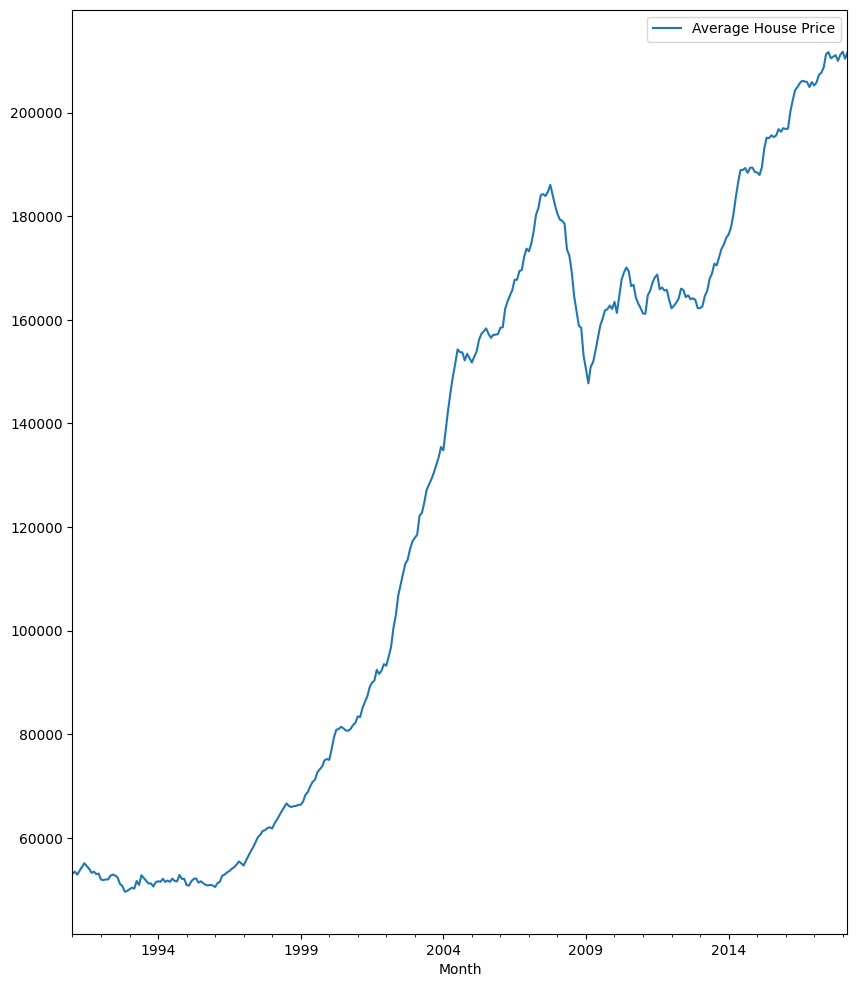

In [16]:
UKHP.plot(figsize=(10,12))

# Summary Statistics
The next step the financial analyst might take is to have a look at different summary statistics for the data set to get a “feeling” for what it is all about:

In [18]:
UKHP.describe().round(2)

,Average House Price
count,327.00
mean,124660.48
std,56387.17
min,49601.66
25%,61654.14
50%,150946.11
75%,169239.28
max,211755.93


Someone may want to calculate the above individually by using the methods:mean(), median(), quantile(),min(), std() or max():

In [20]:
UKHP.mean()

Average House Price    124660.484465
dtype: float64

In [21]:
UKHP.quantile(0.25)

Average House Price    61654.141609
Name: 0.25, dtype: float64

In [22]:
UKHP.std()

Average House Price    56387.165665
dtype: float64

UKHP.columns provides the column names of the dataframe.

In [23]:
UKHP.columns

Index(['Average House Price'], dtype='object')